# Filtrado de imagenes
## Introducción
**Filtro** : Es una tarea básica en el procesamiento de señales e imágenes. El propósito es extraer selectivamente cierta información que se considera importante en la imagen de acuerdo con el entorno de la aplicación. El filtrado puede eliminar el ruido de las imágenes, extraer características visuales de interés, permitir el remuestreo de imágenes y más.

**Análisis de dominio de frecuencia :** Divide la imagen en diferentes partes de frecuencias bajas a altas. Las bajas frecuencias corresponden a regiones con pequeños cambios en la intensidad de la imagen, mientras que las altas frecuencias corresponden a regiones con grandes cambios en la intensidad de la imagen.
En el marco del análisis de frecuencia, un filtro es una operación utilizada para mejorar una banda o frecuencia en una imagen y bloquear (o reducir) otras bandas de frecuencia. El filtro de paso bajo elimina la parte de alta frecuencia de la imagen, pero mantiene la parte de baja frecuencia. El filtro de paso alto elimina los componentes de baja frecuencia.

Filtrado (paso alto, paso bajo, paso de banda, parada de banda), desenfoque, eliminación de ruido, suavizado, etc.

## 1.1 Desenfoque medio (filtro de paso bajo), desenfoque medio (filtrado medio), desenfoque personalizado

* Filtrado medio: un algoritmo de filtrado lineal típico, que se refiere a una plantilla para el píxel objetivo en la imagen, la plantilla incluye píxeles vecinos (8 píxeles alrededor del píxel objetivo como centro para formar una plantilla de filtro, es decir, eliminar Objetivo píxel en sí), y luego reemplace el valor de píxel original con el promedio de todos los píxeles en la plantilla.

* El método de filtrado de la mediana es una técnica de suavizado no lineal. Establece el valor de gris de cada píxel a la mediana de los valores de gris de todos los píxeles en una ventana cercana en ese punto.

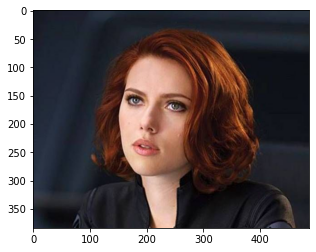

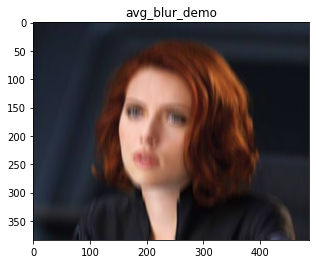

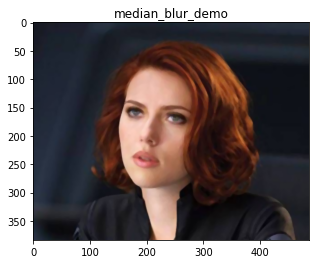

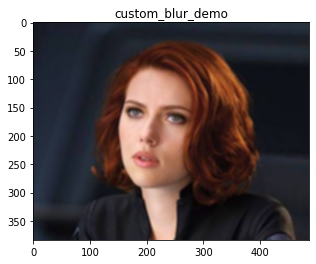

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

 
def blur_demo(image):            
    """
     Desenfoque medio: el ruido aleatorio tiene un buen efecto de eliminación de ruido
    (1, 15) es desenfoque vertical, (15, 1) es desenfoque horizontal
    """
    dst = cv2.blur(image, (1, 15))   
    plt.figure()
    plt.title("avg_blur_demo")
    plt.imshow(dst)

def median_blur_demo(image):    # El desenfoque medio tiene un buen efecto al eliminar el ruido de sal y pimienta
    dst = cv2.medianBlur(image, 5)
    plt.figure()
    plt.title("median_blur_demo")
    plt.imshow(dst)

def custom_blur_demo(image):
    """
     Desenfoque definido por el usuario
        Divida por debajo de 25 para evitar el desbordamiento numérico
    """
    kernel = np.ones([5, 5], np.float32)/25   
    dst = cv2.filter2D(image, -1, kernel)
    plt.figure()
    plt.title("custom_blur_demo")
    plt.imshow(dst)

src = cv2.imread('Imagen_test\\scarlet.jpg')
src = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)
img = cv2.resize(src,None,fx=0.8,fy=0.8,
                  interpolation=cv2.INTER_CUBIC)

plt.imshow(img)

blur_demo(img)
median_blur_demo(img)
custom_blur_demo(img)



## 1.2 Filtrado de preservación de bordes EPF
Se utilizan comúnmente dos métodos para el filtrado de preservación de bordes: el filtrado bilateral gaussiano y el filtrado de desplazamiento medio.

* El filtrado bilateral es un método de filtrado no lineal.Un compromiso entre la proximidad espacial de la imagen y la similitud del valor de píxelAl mismo tiempo, se considera que la información del dominio espacial y la similitud de grises logran el propósito de preservar los bordes y eliminar el ruido. Como su nombre indica, el filtro bilateral tiene una varianza gaussiana más que el filtro gaussiano. \sigma－d σ－dEs una función de filtrado gaussiana basada en la distribución espacial, por lo que cerca del borde, los píxeles más lejanos no afectarán demasiado el valor del píxel en el borde, de modo que se conserva el valor del píxel cerca del borde. Pero debido a que se guarda demasiada información de alta frecuencia, para el ruido de alta frecuencia en las imágenes en color, los filtros bilaterales no se pueden filtrar limpiamente, y solo la información de baja frecuencia se puede filtrar mejor.


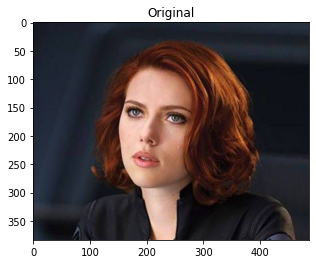

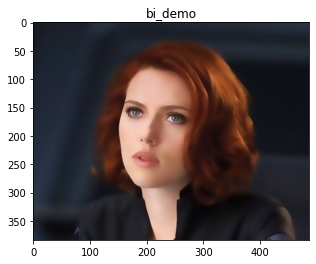

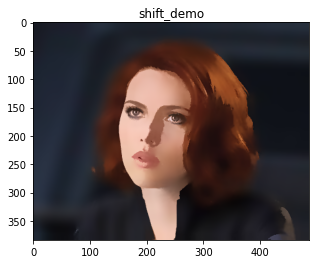

In [13]:
import cv2

def bi_demo(image):      # Filtrado bilateral
    dst = cv2.bilateralFilter(image, 0, 100, 5)
    plt.figure()
    plt.title("bi_demo")
    plt.imshow(dst)
    
def shift_demo(image):   #Migración media
    dst = cv2.pyrMeanShiftFiltering(image, 10, 50)
    plt.figure()
    plt.title("shift_demo")
    plt.imshow(dst)

src = cv2.imread('Imagen_test\\scarlet.jpg')
src = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

img = cv2.resize(src,None,fx=0.8,fy=0.8,
                 interpolation=cv2.INTER_CUBIC)
plt.title("Original")
plt.imshow(img)

bi_demo(img)
shift_demo(img)



## 2.1 Ruido de sal y pimienta (eliminado con filtro medio)

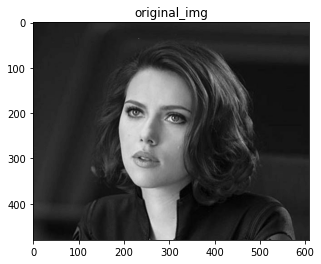

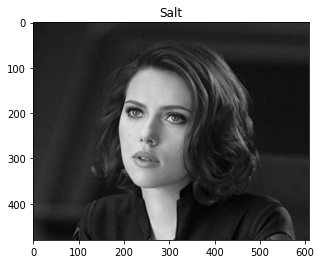

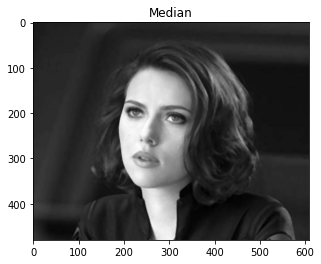

In [17]:
import cv2
import numpy as np

def salt(img, n):
    for k in range(n):
        i = int(np.random.random() * img.shape[1])
        j = int(np.random.random() * img.shape[0])
        if img.ndim == 2:
            img[j,i] = 255
        elif img.ndim == 3:
            img[j,i,0]= 255
            img[j,i,1]= 255
            img[j,i,2]= 255
        return img

img = cv2.imread('Imagen_test\\scarlet.jpg',cv2.IMREAD_GRAYSCALE)
result = salt(img, 500)
median = cv2.medianBlur(result, 5)

plt.figure()
plt.title("original_img")
plt.imshow(img, cmap="gray")
    
plt.figure()
plt.title("Salt")
plt.imshow(result, cmap="gray")

plt.figure()
plt.title("Median")
plt.imshow(median, cmap="gray")


## 2.1 Desenfoque gaussiano (buen efecto de eliminación de ruido)
El desenfoque gaussiano es esencialmente un tipo de desenfoque medio, pero el desenfoque gaussiano se basa en el promedio ponderado: cuanto más cerca esté el punto, mayor será el peso y cuanto más lejos esté el punto, menor será el peso.
En general, el filtrado gaussiano es el proceso del promedio ponderado de toda la imagen. El valor de cada píxel se obtiene por el promedio ponderado de sí mismo y otros valores de píxel en el vecindario .
Podemos saber de su expresión de función:

<center><img src="Imagenes_documento\gausse.png"><center>


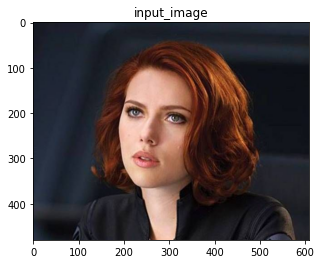

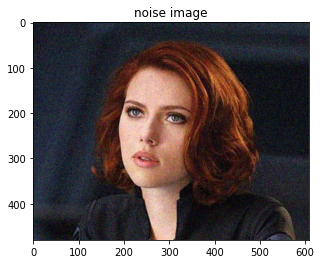

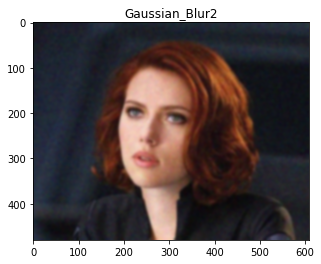

In [22]:
import cv2
import numpy as np

def clamp(pv):
    if pv > 255:
        return 255
    if pv < 0:
        return 0
    else:
        return pv

def gaussian_noise(image):           # Ruido gaussiano
    h, w, c = image.shape
    for row in range(h):
        for col in range(w):
            s = np.random.normal(0, 20, 3)
            b = image[row, col, 0]   # blue
            g = image[row, col, 1]   # green
            r = image[row, col, 2]   # red
            image[row, col, 0] = clamp(b + s[0])
            image[row, col, 1] = clamp(g + s[1])
            image[row, col, 2] = clamp(r + s[2])
    plt.figure()
    plt.title("noise image")
    plt.imshow(image)
    
src = cv2.imread('Imagen_test\\scarlet.jpg')
src = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)
plt.figure()
plt.title("input_image")
plt.imshow(src)

gaussian_noise(src)
dst = cv2.GaussianBlur(src, (15,15), 0) # Desenfoque gaussiano
plt.figure()
plt.title("Gaussian_Blur2")
plt.imshow(dst)


## filtrado de paso alto / filtrado (alto contraste reservado)
Las funciones utilizadas son: cv2.Sobel (), cv2.Schar (), cv2.Laplacian ()

* Sobel, scharr está buscando la primera o segunda derivada. scharr es una optimización para Sobel.

* Laplacian encuentra la segunda derivada.

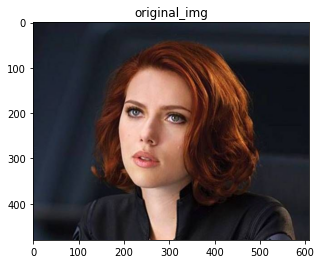

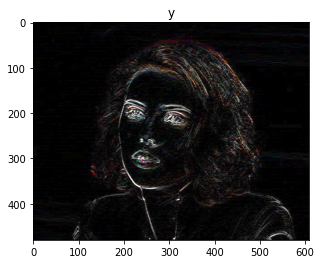

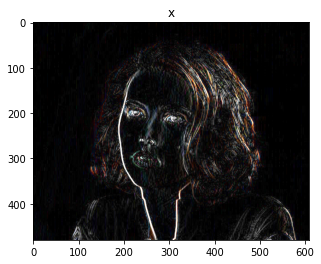

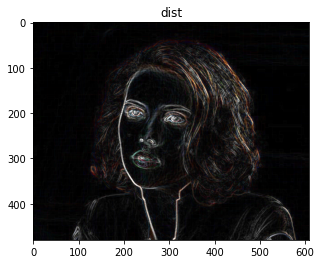

In [19]:
import cv2

img=cv2.imread('Imagen_test\\scarlet.jpg',cv2.IMREAD_COLOR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
x=cv2.Sobel(img,cv2.CV_16S,1,0)
y=cv2.Sobel(img,cv2.CV_16S,0,1)

absx=cv2.convertScaleAbs(x)
absy=cv2.convertScaleAbs(y)
dist=cv2.addWeighted(absx,0.5,absy,0.5,0)

cv2.imshow('original_img',img)
cv2.imshow('y',absy)
cv2.imshow('x',absx)
cv2.imshow('dsit',dist)

plt.figure()
plt.title('original_img')
plt.imshow(img)

plt.figure()
plt.title("y")
plt.imshow(absy)

plt.figure()
plt.title("x")
plt.imshow(absx)

plt.figure()
plt.title("dist")
plt.imshow(dist)
